In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [24]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("diabetes.csv", header=None, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
X = df.drop(columns = ['label'])
y = df.label

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=1,stratify=y)


In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [29]:
print('Accuracy:', logmodel.score(X_test,y_test))

predictions = logmodel.predict(X_test)
# print(predictions)


Accuracy: 0.7760416666666666
[0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0]


In [30]:
CM = confusion_matrix(y_test, predictions)
print("CM:", CM)

CM: [[113  12]
 [ 31  36]]


In [35]:
probs = logmodel.predict_proba(X_test)
# print(probs)
probs=probs[:,1]
# print(probs)

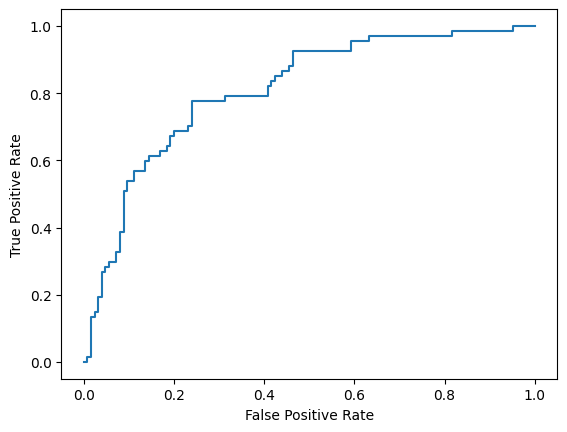

In [41]:
fpr,tpr,_ = roc_curve(y_test,probs)
auc = roc_auc_score(y_test,probs)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [42]:
Auc = roc_auc_score(y_test,probs)
print("Logistic: ROC AUC = %.3f" % (Auc))
print(f'Logistic: ROC AUC = { Auc:.3f}')

Logistic: ROC AUC = 0.809
Logistic: ROC AUC = 0.809
